In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 

In [17]:
x,y = make_circles(n_samples=300)

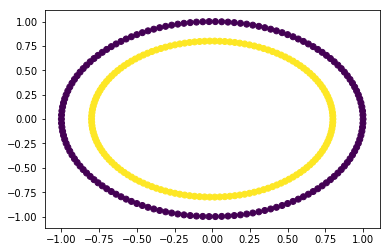

In [18]:
plt.scatter(x[:,0],x[:,1],c=y)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [21]:
x_scale

array([[ 1.09269056e+00, -1.11581886e+00],
       [-1.18222766e+00, -1.02047154e+00],
       [-8.91304848e-01, -1.28241961e+00],
       [-1.14137465e+00, -5.08172733e-01],
       [ 1.53986710e+00,  2.60449025e-01],
       [ 1.42671831e+00, -6.35215916e-01],
       [-1.21013821e+00, -3.10710682e-01],
       [-7.80868809e-01,  1.35250445e+00],
       [-1.49508187e+00, -4.51391830e-01],
       [-6.24695048e-01,  1.08200356e+00],
       [ 5.44378079e-01, -1.46378854e+00],
       [-2.85299315e-01,  1.21637984e+00],
       [-5.44378079e-01,  1.46378854e+00],
       [-5.78837477e-01,  1.10721397e+00],
       [ 1.30080444e+00, -8.64252400e-01],
       [ 4.82603465e-01,  1.48530074e+00],
       [ 1.17989448e+00,  4.10882731e-01],
       [-1.54942285e+00,  1.95737626e-01],
       [-1.39886675e+00, -6.94403486e-01],
       [ 4.84158135e-01, -1.15176669e+00],
       [ 1.54942285e+00,  1.95737626e-01],
       [-1.24939010e+00,  6.98599474e-16],
       [-9.10766183e-01, -8.55266374e-01],
       [ 1.

In [28]:
from sklearn import cluster , mixture
from sklearn import metrics
km = cluster.KMeans(n_clusters=2)
km.fit(x)
metrics.silhouette_score(x_scale, km.labels_)

0.3982907324264433

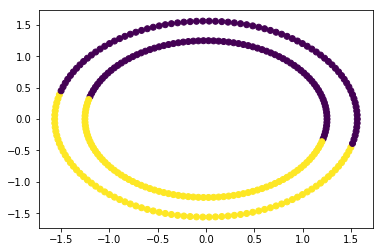

In [8]:
plt.scatter(x_scale[:,0],x_scale[:,1],c=km.labels_)

### Mean shift

In [9]:
bandwidth = cluster.estimate_bandwidth(x_scale,quantile=0.4,n_samples=300)
ms = cluster.MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(x_scale)

MeanShift(bandwidth=1.6403082847055368, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [10]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 2


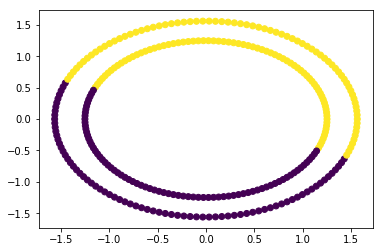

In [11]:
plt.scatter(x_scale[:,0],x_scale[:,1],c=ms.labels_)

### Spectral Clustering

In [26]:
spec_c = cluster.SpectralClustering(n_clusters=2 , affinity="nearest_neighbors")
spec_c.fit(x_scale)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

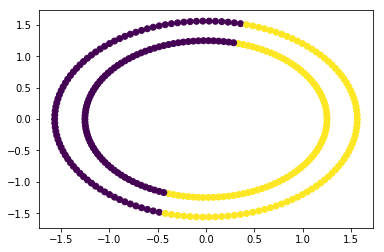

In [27]:
plt.scatter(x_scale[:,0],x_scale[:,1],c=spec_c.labels_)

### Gaussian Clustering

In [36]:
gc = mixture.GaussianMixture(n_components=2)
gc.fit(x_scale)
labels = gc.predict(x_scale)

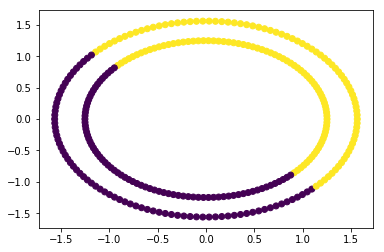

In [37]:
plt.scatter(x_scale[:,0],x_scale[:,1],c=labels)